## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

# Supervised Learning - Regularization

In this exercise we're going to look at how to lower the chance of overfitting by using regularization parameters with a variety of different linear models. 

## Lasso & Ridge Regression

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge) are two commonly used linear models with regularization. 

Lasso uses the $l_1$ norm for regularization and so has the following objective:

$$ 1 / (2 * n_{samples})) * ||y - Xw||^2_2 + \alpha * ||w||_1 $$ 

Whereas Ridge regression uses the $l_2$ norm for regularization and has the following objective:

$$ ||y - Xw||^2_2 + \alpha * ||w||^2_2 $$





In [43]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [45]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [46]:
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

In [50]:
def determine_coefficients(alphas, model_class, X, y):
    """Determine the coefficients of a linear model given the various alphas. 
    You should train a model for each value of alpha and then score it using mean_sqaure error
    
    Args:
        alphas (iterable): The alphas to test out with the model
        model_class (sklearn.estimator Class): A type of linear model **not instantiated**
        X (iterable): The data to train on
        y (iterable): The labels to train on
        
    Returns:
        coefs (iterable): the coefficients extracted from the trained model. See model.coef_
    """
    coefs = []
    for i in alphas:
      clf = model_class(alpha=i)
      clf.fit(X, y)
      coefs.append( clf.coef_ )
      # mean_square_error
      pred = clf.predict(X)
      my_mean_square_error = mean_squared_error( y,pred ) # or ytrue,y_pred
    
    return coefs


In [51]:
coefs = determine_coefficients(alphas, Ridge, X, y)

In [52]:
assert coefs
assert coefs[0].shape == (10,)
assert len(coefs) == len(alphas)


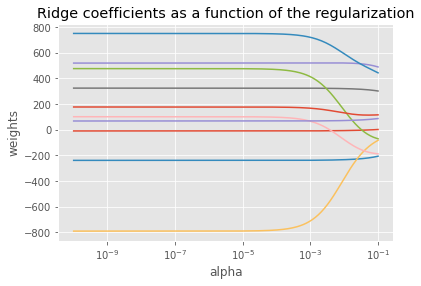

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
# Set the coefficients of lasso with the same data and alphas as ridge to lassoCoefs
# YOUR CODE HERE
#raise NotImplementedError()
lassoCoefs = determine_coefficients(alphas, Lasso, X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526319.3158597659, tolerance: 262.1009124434389
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516362.7914363091, tolerance: 262.1009124434389
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 505640.64391520916, tolerance: 262.1009124434389
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494128.0989

In [ ]:
assert lassoCoefs
assert lassoCoefs[0].shape == (10,)
assert len(lassoCoefs) == len(alphas)
assert not np.all([lassoCoefs,coefs])

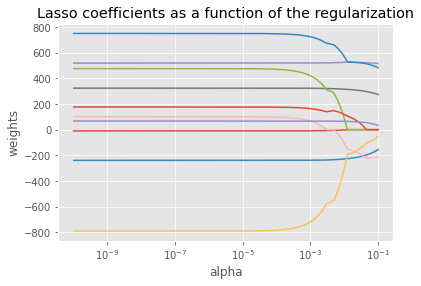

In [ ]:
ax = plt.gca()

ax.plot(alphas, lassoCoefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Note that with lasso, the coefficients are significantly smaller.

## Elastic Net

[Elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic#sklearn.linear_model.ElasticNet) combines the two approaches by using both the $l_1$ and $l_2$ squared norms minimizing the objective:

$$ 1 / (2 * n_{samples}) * ||y - Xw||^2_2
+ \alpha * l1_{ratio} * ||w||_1
+ 0.5 * \alpha * (1 - l1_{ratio}) * ||w||^2_2$$



> The next section is copied from [the documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html) and is meant to show you how the coefficients change with various values of alphe for both lasso and elastic net. 

In [ ]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

eps = 5e-3

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

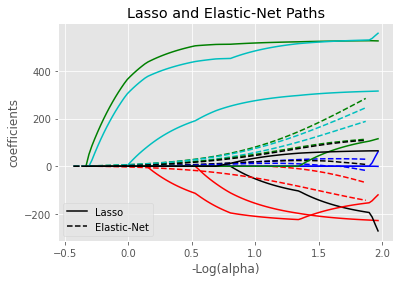

In [ ]:
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')
plt.show()

Note that with elastic net, the coefficients go above zero with a larger value of alpha. Change the `l1_ratio` above and see how that affects the graph.

The higher the `l1_ratio` the faster the coefficients should go above zero.

## Feedback

In [ ]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "Explain why the mean square error is required"